In [ ]:
#Import required libraries
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import joblib
from sklearn import metrics
import torch.nn as nn
import torch.nn.functional
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
import time
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Google Drive path where coursework material is available
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'My_Computer_vision/CV_Coursework/CW_Folder_PG_template/CW_Folder_PG'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Code', 'test_functions.ipynb', 'Models', 'Video', 'CW_Dataset', 'Test_functions_video.ipynb', 'Copy of test_functions.ipynb', 'FaceDetectionVideo_using_CNN_MObilenet.ipynb', 'Report template.docx', 'test_functions_v3.ipynb']


In [ ]:
#Magic comand to load for automatic loading of modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#import modules located in code directory
import sys
CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'Code')
sys.path.append(CODE_PATH)

In [ ]:
#extracted data from zipped file to copy in Colab
zip_path = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset/CV2024_CW_Dataset.zip')

  # Copy it to Colab
!cp '{zip_path}' .
  # Unzip it
!yes|unzip -q CV2024_CW_Dataset.zip

# Delete zipped version from Colab (not from Drive)
!rm CV2024_CW_Dataset.zip

replace test/images/image_2711.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2654.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2438.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2592.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2746.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2603.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2480.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2750.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2615.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2496.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2479.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2707.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2642.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image

In [ ]:
#import required functions from Load_data python script to load data
from Load_data import FileNameList,Fetch_text_data, Fetch_images
#FileNameList is the function to collect all the filnames (images and labels)
#Fetch_text_data is a funtion to import all label names from labels folder into the list
#Fetch_images is a function to import all the images from images folder

In [ ]:
test_label_data = Fetch_text_data('test/labels',FileNameList('test/labels','.txt')) #import test labels
train_label_data = Fetch_text_data('train/labels',FileNameList('train/labels','.txt')) # import train labels
test_images_data = Fetch_images('test/images',FileNameList('test/images', '.jpeg')) #import test images
train_images_data = Fetch_images('train/images',FileNameList('train/images', '.jpeg')) #import train images

In [ ]:
print(f'Train labels distribution: {Counter(train_label_data)}') #data is imbalance
print(f'Test labels distribution: {Counter(test_label_data)}') #data is imbalance

Train labels distribution: Counter({'1': 1940, '0': 376, '2': 78})
Test labels distribution: Counter({'1': 388, '0': 51, '2': 19})


In [ ]:
#import required functions from the preprocessing python script
from preprocessing import ResizeAndHOGTransformation
#ResizeAndHOGTransformation is a function to resize the images and perform HOG transformation of to get the required features of the images which
#later will be used to train the model

In [ ]:
train_images,y_label_train, HOG_desctriptors_train, HOG_images_train = ResizeAndHOGTransformation(train_images_data,train_label_data,128,128)

In [ ]:
#balacing data using oversampling technique
# x_resampled_imageHOG, y_resampled_label = SMOTE().fit_resample(HOG_desctriptors_train, y_label_train)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load

In [ ]:
#define list of hyperparameters to be used in Grid search
param_grid = {
        'hidden_layer_sizes': [(100,), (100, 150), (100, 150, 200)], #hidde layers
        'alpha': [0.0001, 0.001, 0.01], #weight decay
        'learning_rate_init': [0.3, 0.03, 0.003, 0.0003], #learning rate
        'momentum': [0.9, 0.95], #momentum

    }

In [ ]:
mlp = MLPClassifier(max_iter=100,verbose=True, random_state=4) #create object of mlp classifier

In [ ]:
from sklearn.model_selection import GridSearchCV #import gridsearch

In [ ]:
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1) #create object of grid search

In [ ]:
# grid_search.fit(x_resampled_imageHOG, y_resampled_label) #initially considered  balanced data

Iteration 1, loss = 0.79231454
Iteration 2, loss = 0.31472254
Iteration 3, loss = 0.20541609
Iteration 4, loss = 0.15169195
Iteration 5, loss = 0.12679794
Iteration 6, loss = 0.08935391
Iteration 7, loss = 0.25241656
Iteration 8, loss = 0.10180135
Iteration 9, loss = 0.06704753
Iteration 10, loss = 0.05477786
Iteration 11, loss = 0.11982163
Iteration 12, loss = 0.05819667
Iteration 13, loss = 0.03799020
Iteration 14, loss = 0.02729231
Iteration 15, loss = 0.02214096
Iteration 16, loss = 0.01839070
Iteration 17, loss = 0.08346685
Iteration 18, loss = 0.03133557
Iteration 19, loss = 0.03078744
Iteration 20, loss = 0.01299514
Iteration 21, loss = 0.01036233
Iteration 22, loss = 0.01002959
Iteration 23, loss = 0.00917070
Iteration 24, loss = 0.00889272
Iteration 25, loss = 0.00873850
Iteration 26, loss = 0.00856762
Iteration 27, loss = 0.00843992
Iteration 28, loss = 0.00832996
Iteration 29, loss = 0.00821872
Iteration 30, loss = 0.00811338
Iteration 31, loss = 0.00800858
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(max_iter=100, random_state=4,
                                     verbose=True),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (100, 150),
                                                (100, 150, 200)],
                         'learning_rate_init': [0.3, 0.03, 0.003, 0.0003],
                         'momentum': [0.9, 0.95]})

In [ ]:
grid_search.fit(HOG_desctriptors_train, y_label_train) #final grid search on unbalanced data

In [ ]:
grid_search.best_estimator_ #find final hyperparameters

MLPClassifier(alpha=0.01, learning_rate_init=0.0003, max_iter=100,
              random_state=4, verbose=True)

In [ ]:
grid_search.best_params_

{'alpha': 0.01,
 'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.0003,
 'momentum': 0.9}

In [ ]:
# create final Multi-Layer Perceptron model using hyper parameters obtaiined in Grid search
mlp_model = MLPClassifier(hidden_layer_sizes=(100), max_iter=100, alpha=0.01,
                    solver='adam', verbose=True, random_state=1,
                    learning_rate_init=.0003, momentum=0.9)
start_time = time.time()
mlp_model.fit(HOG_desctriptors_train, y_label_train) # train the model
end_time = time.time()
elapsed_time = end_time- start_time
print(f"Training completed in {elapsed_time // 60:.0f}m {elapsed_time % 60:.0f}s") # monitor time required to train the model

Iteration 1, loss = 0.66766729
Iteration 2, loss = 0.53817076
Iteration 3, loss = 0.48990026
Iteration 4, loss = 0.44936590
Iteration 5, loss = 0.42090509
Iteration 6, loss = 0.39291551
Iteration 7, loss = 0.37272076
Iteration 8, loss = 0.35794909
Iteration 9, loss = 0.34448048
Iteration 10, loss = 0.32880475
Iteration 11, loss = 0.31822527
Iteration 12, loss = 0.30873421
Iteration 13, loss = 0.30322051
Iteration 14, loss = 0.29451936
Iteration 15, loss = 0.28663522
Iteration 16, loss = 0.27720281
Iteration 17, loss = 0.27051863
Iteration 18, loss = 0.26485446
Iteration 19, loss = 0.25969800
Iteration 20, loss = 0.25427948
Iteration 21, loss = 0.24712058
Iteration 22, loss = 0.24298884
Iteration 23, loss = 0.24015351
Iteration 24, loss = 0.23343423
Iteration 25, loss = 0.22965512
Iteration 26, loss = 0.22452195
Iteration 27, loss = 0.22027279
Iteration 28, loss = 0.21599416
Iteration 29, loss = 0.21218475
Iteration 30, loss = 0.20939006
Iteration 31, loss = 0.20664903
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#HOG transformation on test data to get their HOG descriptors
test_images, y_label_test, HOG_desctriptors_test, HOG_images_test = ResizeAndHOGTransformation(test_images_data,test_label_data,128,128)

In [ ]:
start_time = time.time()
y_pred = mlp_model.predict(HOG_desctriptors_test) # prediction on test data
end_time = time.time()
elapsed_time = end_time- start_time
print(f"Training completed in {elapsed_time // 60:.0f}m {elapsed_time % 60:.0f}s")

Training completed in 0m 0s


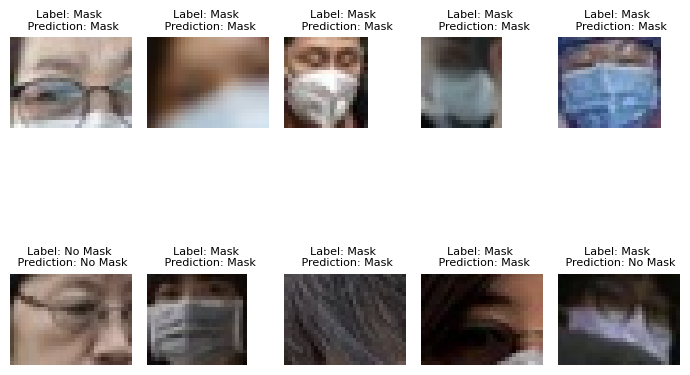

In [ ]:
#display images with their true and predicted labels
#code partially adapted from the Lab
images, label, y = shuffle(test_images, y_label_test, y_pred)
fig, axes = plt.subplots(2, 5, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()
dict = {1: 'Mask', 2: 'Incorrect Mask', 0: 'No Mask'}


for i in range(10):
    ax[i].imshow(images[i])
    ax[i].set_title(f'Label: {dict[label[i]]} \n Prediction: {dict[y[i]]}', fontsize =8)
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

In [ ]:
#print the performance matrics model

print(f"""Classification report for classifier {mlp_model}:
      {metrics.classification_report(y_label_test, y_pred)}\n""")

Classification report for classifier MLPClassifier(alpha=0.01, hidden_layer_sizes=100, learning_rate_init=0.0003,
              max_iter=100, random_state=1, verbose=True):
                    precision    recall  f1-score   support

           0       0.57      0.55      0.56        51
           1       0.92      0.94      0.93       388
           2       0.67      0.42      0.52        19

    accuracy                           0.87       458
   macro avg       0.72      0.64      0.67       458
weighted avg       0.87      0.87      0.87       458




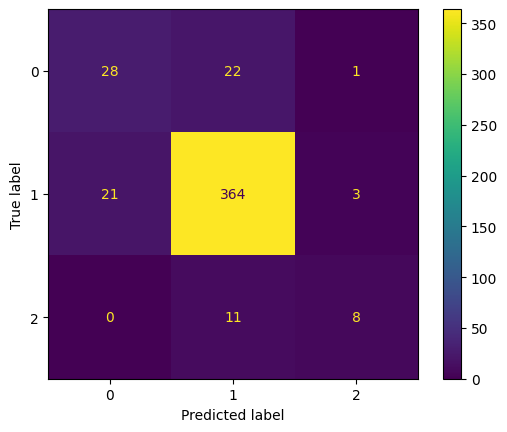

In [ ]:
#confusion matrix to compare true and predicted output
metrics.ConfusionMatrixDisplay.from_predictions(y_label_test, y_pred)
plt.show()

In [ ]:
#Performance metrics
print(f'Accuracy: {accuracy_score(y_label_test, y_pred)}')
print(f'F1 score: {f1_score(y_label_test, y_pred, average="weighted")}')
print(f'recall: {recall_score(y_label_test, y_pred,average="weighted")}')
print(f'precision:{precision_score(y_label_test, y_pred,average="weighted")}')

Accuracy: 0.8733624454148472
F1 score: 0.8694174742472923
recall: 0.8733624454148472
precision:0.8680297699579871


In [ ]:
#Save best model using joblib
#joblib.dump(mlp_model, 'drive/My Drive/My_Computer_vision/CV_Coursework/CW_Folder_PG_template/CW_Folder_PG/Models/MLP_hog_final')

['drive/My Drive/My_Computer_vision/CV_Coursework/CW_Folder_PG_template/CW_Folder_PG/Models/MLP_hog_final']